# **Student Performance Prediction**

## 1. Objective
This study's goal is to use various linear regression models to guess students' final grades (G3) and find the most important factors influencing their academic success. The objective is to train different regression models, check how accurate they are, and choose the best model for making predictions. The other thing we want to do is figure out how different factors, like study time, failures, family education level, absences, and past grades (G1, G2), affect the end grade (G3).

## 2. Dataset
The file has information about how well kids in a Portuguese school did in school. It has information about the students' backgrounds (like how much their parents learned, mistakes, dropouts, etc.) as well as how well they did in school. (https://archive.ics.uci.edu/dataset/320/student+performance)

### *What the dataset has:*
**Studytime:** Failures during weekly study time: Number of mistakes in the past

**Medu:** Level of education of mother (0–4 scale)

**Fedu:** How much schooling your father has (0–4 scale)

**absences:** The number of days missed from school

**G1, G2:** Grades from earlier times

**G3:** Final score (goal variable to guess)


In [4]:
#Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [9]:
#import the data
file_path = "C:/Users/adaer/Desktop/MyDatabase/student-mat.csv"
student_data = pd.read_csv(file_path, delimiter=';')

## 3. Data Exploration and Cleaning
Examining the data turned up no missing values or outliers. The dataset was cleaned and ready for study; categorical variables were encoded. Eighty percent of the data was used for training and twenty percent for testing.

In [11]:
student_data = pd.get_dummies(student_data, drop_first=True)

## 4. Features and Target

In [12]:
features = ['studytime', 'failures', 'Medu', 'Fedu', 'absences', 'G1', 'G2']
target = 'G3'

x = student_data[features]
y = student_data[target]

## 5. Modeling

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

#Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

#Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

#Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)

### Performance:

Linear Regression R² Score: 0.7806212503957508
Linear Regression MSE: 4.498371630244348


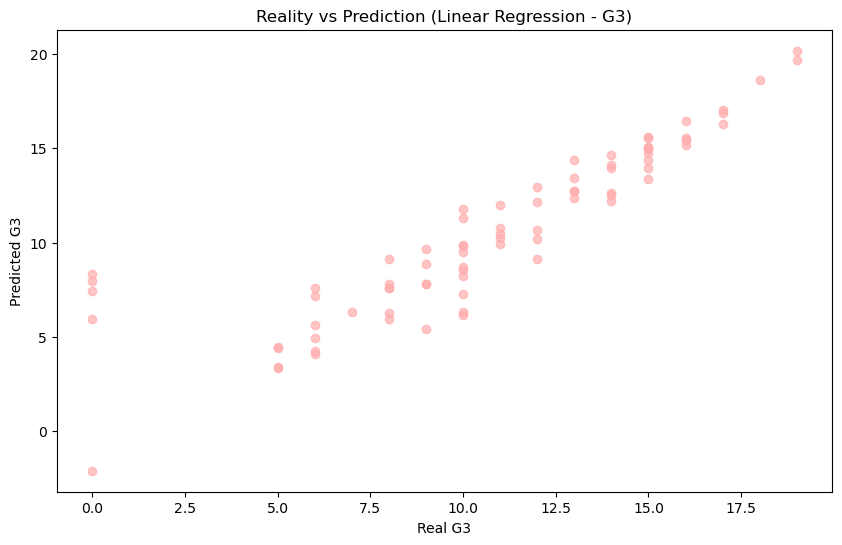

In [19]:
print("Linear Regression R² Score:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear,color="#FFADAD", alpha=0.7)
plt.title("Reality vs Prediction (Linear Regression - G3)")
plt.xlabel("Real G3")
plt.ylabel("Predicted G3")
plt.show()

Polynomial Regression R² Score: 0.7731979453994148
Polynomial Regression MSE: 4.65058685007949


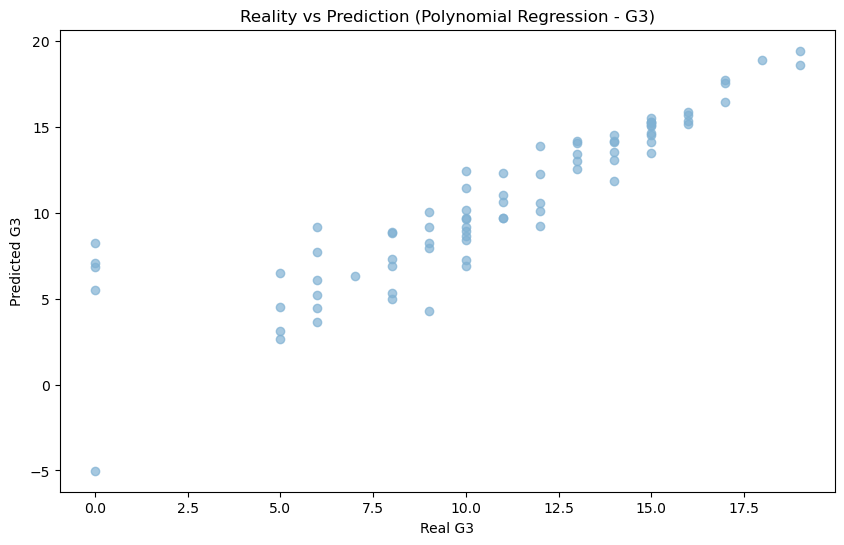

In [20]:
print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color = "#80B1D3", alpha=0.7)
plt.title("Reality vs Prediction (Polynomial Regression - G3)")
plt.xlabel("Real G3")
plt.ylabel("Predicted G3")
plt.show()

Ridge Regression R² Score: 0.7807674839393528
Ridge Regression MSE: 4.495373104520613


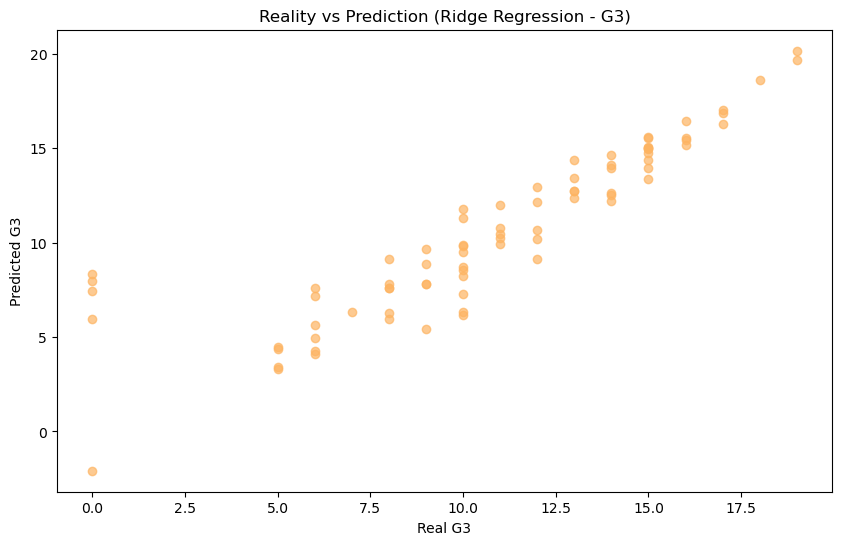

In [22]:
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge,  color = "#FDB462",  alpha=0.7)
plt.title("Reality vs Prediction (Ridge Regression - G3)")
plt.xlabel("Real G3")
plt.ylabel("Predicted G3")
plt.show()

Lasso Regression R² Score: 0.7879067485919122
Lasso Regression MSE: 4.348982145360649


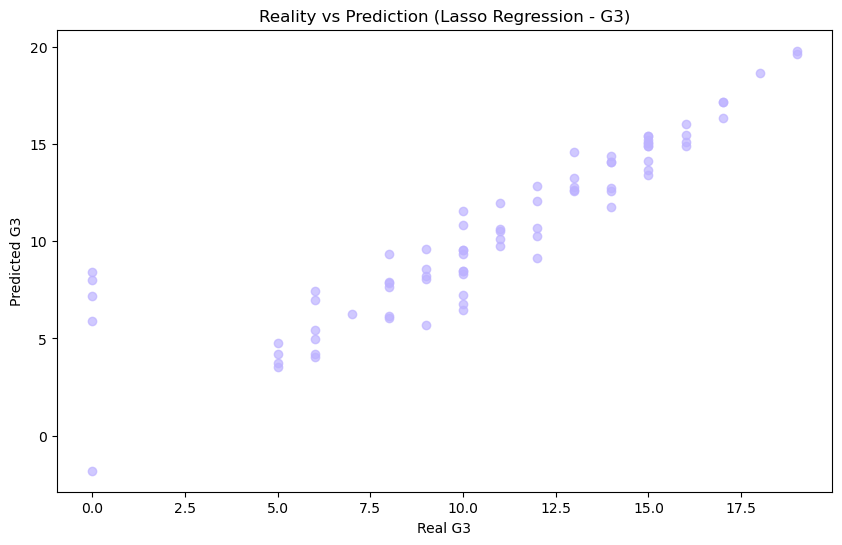

In [23]:
print("Lasso Regression R² Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color = "#BDB2FF", alpha=0.7)
plt.title("Reality vs Prediction (Lasso Regression - G3)")
plt.xlabel("Real G3")
plt.ylabel("Predicted G3")
plt.show()

## 6. Results
The Lasso model demonstrated superior performance compared to other models in predicting the target variable (G3).
An R^2 score of 78.79% signifies that the model accounts for a substantial amount of the variance in the target variable.

The model's accuracy and explanatory capacity may be enhanced by adding new characteristics.
The model may be more effective if fewer significant elements are removed through a more thorough feature selection procedure.

Other factors, such as family income or private instruction, might be added to the model to make it better. Generalization may be improved by increasing the dataset, and predictions may be further refined by experimenting with more complex algorithms or modifying polynomial degrees.